In [32]:
# Setup

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway, pearsonr
import statsmodels.api as sm

player_per_game = pd.read_csv('Player_per_game.csv')

player_per_game = player_per_game[player_per_game['season'] >= 2000]

multi_team_players = player_per_game[player_per_game.duplicated(subset=['player', 'season'], keep=False)]['player'].unique()
player_stats = player_per_game[(player_per_game['tm'] == 'TOT') | (~player_per_game['player'].isin(multi_team_players))]
player_stats = player_stats.reset_index(drop=True)
player_stats = player_stats.drop(columns=['birth_year', 'lg'])
player_stats['pos'] = player_stats['pos'].str.split('-').str[0]
player_stats['total_contributions_per_game'] = (player_stats['pts_per_game'] + player_stats['trb_per_game'] + player_stats['ast_per_game'])


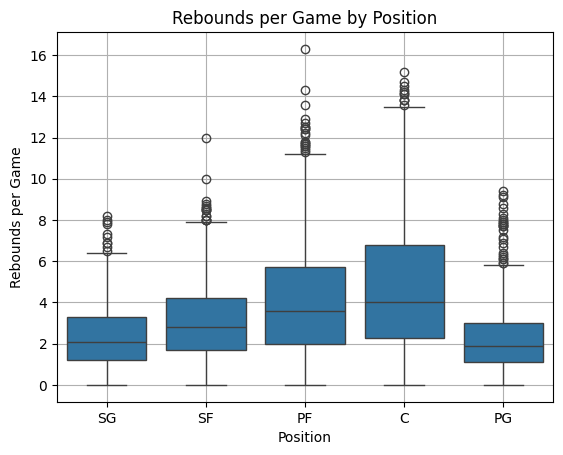

F-statistic: 343.038917468365, p-value: 3.004124436143729e-268
There is a significant difference in rebounds per game between positions.


In [26]:
# Experiment 1: Effect of Position on Rebounds per Game

plt.figure()
sns.boxplot(data=player_stats, x='pos', y='trb_per_game')
plt.title("Rebounds per Game by Position")
plt.xlabel("Position")
plt.ylabel("Rebounds per Game")
plt.grid(True)
plt.show()

grouped_data = [group['trb_per_game'].values for name, group in player_stats.groupby('pos')]

f_stat, p_value = f_oneway(*grouped_data)

print(f"F-statistic: {f_stat}, p-value: {p_value}")
alpha = 0.05
if p_value < alpha:
    print("There is a significant difference in rebounds per game between positions.")
else:
    print("There is no significant difference in rebounds per game between positions.")

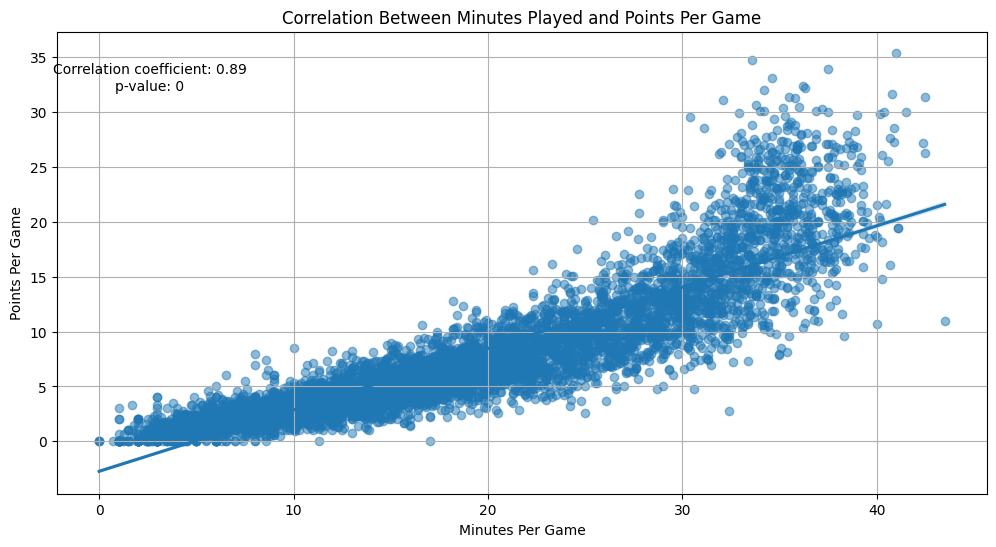

Reject the null hypothesis: significant correlation between minutes played and points scored.


In [29]:
# Experiment 2: Correlation between Minutes Played and ppg

corr, p_value = pearsonr(player_stats['mp_per_game'], player_stats['pts_per_game'])

plt.figure(figsize=(12, 6))
sns.regplot(x='mp_per_game', y='pts_per_game', data=player_stats, scatter_kws={'alpha':0.5})
plt.title('Correlation Between Minutes Played and Points Per Game')
plt.xlabel('Minutes Per Game')
plt.ylabel('Points Per Game')
plt.grid(True)
plt.text(0.1, 0.9, f'Correlation coefficient: {corr:.2f}\np-value: {p_value:.2g}',
         horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
plt.show()

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: significant correlation between minutes played and points scored.")
else:
    print("Fail to reject the null hypothesis: no significant correlation.")

<ipython-input-33-691187dae30c>:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(0.1, 0.9, f'R²: {model.rsquared:.2f}\np-value: {model.pvalues[1]:.2g}',


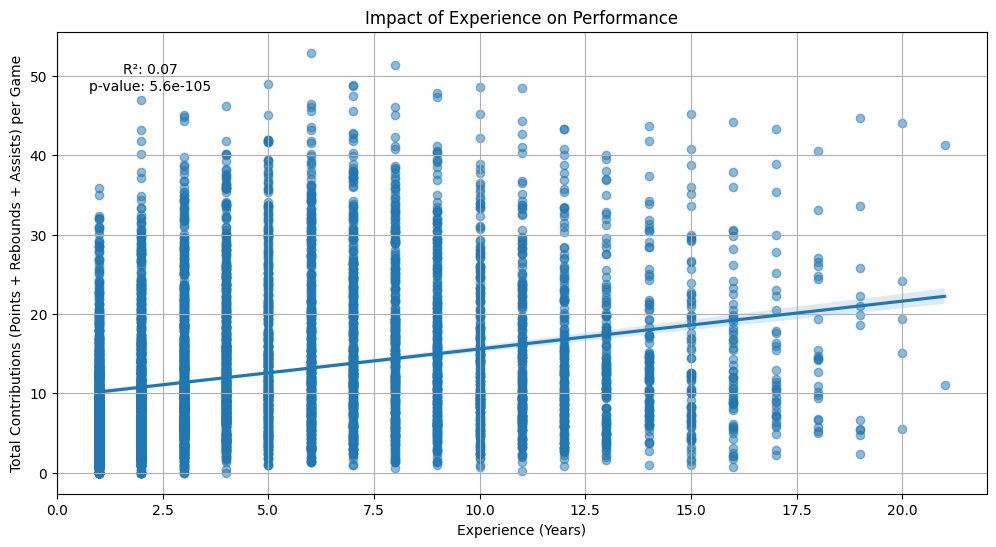

                                 OLS Regression Results                                 
Dep. Variable:     total_contributions_per_game   R-squared:                       0.070
Model:                                      OLS   Adj. R-squared:                  0.070
Method:                           Least Squares   F-statistic:                     491.2
Date:                          Tue, 22 Oct 2024   Prob (F-statistic):          5.65e-105
Time:                                  04:14:59   Log-Likelihood:                -23465.
No. Observations:                          6489   AIC:                         4.693e+04
Df Residuals:                              6487   BIC:                         4.695e+04
Df Model:                                     1                                         
Covariance Type:                      nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [33]:
# Experiment 3: Impact of experience on performance

X = player_stats['experience']
y = player_stats['total_contributions_per_game']
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

plt.figure(figsize=(12, 6))
sns.regplot(x='experience', y='total_contributions_per_game', data=player_stats, scatter_kws={'alpha':0.5})
plt.title('Impact of Experience on Performance')
plt.xlabel('Experience (Years)')
plt.ylabel('Total Contributions (Points + Rebounds + Assists) per Game')
plt.grid(True)
plt.text(0.1, 0.9, f'R²: {model.rsquared:.2f}\np-value: {model.pvalues[1]:.2g}',
         horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
plt.show()

# Print the summary of the regression
print(model.summary())